In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox
%matplotlib inline


In [2]:
df = pd.read_csv("C:/Users/mdr/Desktop/data.csv")
df

,RECORD,hbpermin,Pseg,PQseg,QRSseg,QRseg,QTseg,RSseg,STseg,Tseg,...,RMSSD,QRSarea,QRSperi,PQslope,QRslope,RSslope,STslope,NN50,pNN50,ECG_signal
0,1,74.925669,0.076508,0.108889,0.088254,0.043571,0.193016,0.044683,0.104762,0.130476,...,292.296636,18.457618,63.615239,-0.014364,0.075270,-0.070846,0.012606,2,5.882353,ARR
1,2,68.503469,0.072483,0.096181,0.093924,0.046267,0.193490,0.047656,0.099566,0.089149,...,318.563915,23.043230,67.787773,-0.021207,0.083773,-0.077458,0.016175,1,3.225806,ARR
2,3,83.488603,0.071154,0.086610,0.039530,0.018590,0.132479,0.020940,0.092949,0.094444,...,273.165412,10.756353,29.253827,-0.042542,NaN,NaN,0.027131,16,42.105263,ARR
3,4,68.503469,0.082812,0.108160,0.090365,0.045226,0.188802,0.045139,0.098437,0.088281,...,313.046941,23.845086,65.228737,-0.017806,0.091591,-0.088559,0.017022,2,6.451613,ARR
4,5,82.080000,0.070760,0.102632,0.101023,0.049415,0.193713,0.051608,0.092690,0.085965,...,263.225676,20.942791,72.830353,-0.016650,0.064547,-0.062246,0.016191,2,5.405405,ARR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1196,91.392000,0.051353,0.062500,0.019150,0.010051,0.118045,0.009099,0.098895,0.086557,...,84.181251,0.000000,0.220347,-0.195477,NaN,NaN,0.064196,0,0.000000,NSR
1196,1197,61.440000,0.057355,0.061547,0.061261,0.031345,0.134099,0.029916,0.072837,0.090987,...,124.648975,8.243245,22.692888,-0.111698,0.255964,-0.278531,0.112012,0,0.000000,NSR
1197,1198,93.322709,0.058927,0.109137,0.080936,0.040301,0.168112,0.040635,0.087176,0.088081,...,82.427729,7.623618,22.380510,-0.045271,0.247145,-0.259303,0.064318,1,0.613497,NSR
1198,1199,63.744000,0.061500,0.101277,0.081793,0.041159,0.145913,0.040635,0.064120,0.081174,...,120.230064,8.614011,22.993533,-0.052626,0.263921,-0.280417,0.113422,9,5.521472,NSR


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 56 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RECORD      1200 non-null   int64  
 1   hbpermin    1200 non-null   float64
 2   Pseg        1200 non-null   float64
 3   PQseg       1200 non-null   float64
 4   QRSseg      1200 non-null   float64
 5   QRseg       1200 non-null   float64
 6   QTseg       1200 non-null   float64
 7   RSseg       1200 non-null   float64
 8   STseg       1200 non-null   float64
 9   Tseg        1200 non-null   float64
 10  PTseg       1200 non-null   float64
 11  ECGseg      1200 non-null   float64
 12  QRtoQSdur   431 non-null    float64
 13  RStoQSdur   431 non-null    float64
 14  RRmean      1200 non-null   float64
 15  PPmean      1200 non-null   float64
 16  PQdis       1200 non-null   float64
 17  PonQdis     1200 non-null   float64
 18  PRdis       1200 non-null   float64
 19  PonRdis     1200 non-null  

In [4]:
df.isna().sum()

RECORD          0
hbpermin        0
Pseg            0
PQseg           0
QRSseg          0
QRseg           0
QTseg           0
RSseg           0
STseg           0
Tseg            0
PTseg           0
ECGseg          0
QRtoQSdur     769
RStoQSdur     769
RRmean          0
PPmean          0
PQdis           0
PonQdis         0
PRdis           0
PonRdis         0
PSdis           0
PonSdis         0
PTdis           0
PonTdis         0
PToffdis        0
QRdis           0
QSdis           0
QTdis           0
QToffdis        0
RSdis           0
RTdis           0
RToffdis        0
STdis           0
SToffdis        0
PonToffdis      0
PonPQang      557
PQRang        768
QRSang        769
RSTang        769
STToffang     426
RRTot           0
NNTot           0
SDRR            0
IBIM            0
IBISD           0
SDSD            0
RMSSD           0
QRSarea         0
QRSperi         0
PQslope         0
QRslope       768
RSslope       769
STslope         0
NN50            0
pNN50           0
ECG_signal

In [5]:
df.describe()

,RECORD,hbpermin,Pseg,PQseg,QRSseg,QRseg,QTseg,RSseg,STseg,Tseg,...,SDSD,RMSSD,QRSarea,QRSperi,PQslope,QRslope,RSslope,STslope,NN50,pNN50
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,...,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,432.000000,431.000000,1200.000000,1200.000000,1200.000000
mean,600.500000,81.893980,0.060902,0.078099,0.048238,0.024437,0.141541,0.023800,0.093303,0.102714,...,42.484060,199.417894,7.675047,23.915846,-0.071647,0.141737,-0.150496,0.041659,6.442500,8.112425
std,346.554469,19.324351,0.009453,0.019897,0.034649,0.017501,0.029225,0.017175,0.013332,0.022594,...,105.722123,112.292014,8.452832,25.070324,0.049705,0.073086,0.077532,0.026456,7.748445,10.325033
min,1.000000,12.857143,0.021556,0.044526,0.000000,0.000000,0.098761,0.000000,0.052338,0.034936,...,0.800624,61.711281,0.000000,0.000000,-0.219938,0.028660,-0.315525,0.008183,0.000000,0.000000
25%,300.750000,67.563000,0.053943,0.060344,0.015101,0.007804,0.116016,0.007143,0.089423,0.090046,...,4.060951,123.147741,0.000000,0.124186,-0.106660,0.082613,-0.240304,0.023853,1.000000,0.613497
50%,600.500000,79.872000,0.060642,0.075184,0.044692,0.022676,0.137019,0.021965,0.097825,0.099210,...,11.265829,183.603851,5.228299,19.904060,-0.058518,0.108418,-0.116241,0.034460,3.000000,3.680982
75%,900.250000,96.000000,0.066849,0.095190,0.083032,0.041915,0.166314,0.041097,0.101200,0.112408,...,44.785825,248.101035,14.355389,46.194325,-0.027685,0.229659,-0.087565,0.049778,10.000000,12.883436
max,1200.000000,160.500000,0.095317,0.145577,0.120160,0.065278,0.211111,0.058333,0.138444,0.198413,...,1725.927603,1478.488460,33.131007,86.577082,-0.005427,0.270786,-0.027983,0.164633,37.000000,52.727273


hbpermin (Heartbeats per Minute)

    Description: The heart rate, measured as the number of heartbeats per minute.

    Purpose: Indicates the overall cardiac activity. Normal resting heart rate ranges from 60 to 100 bpm

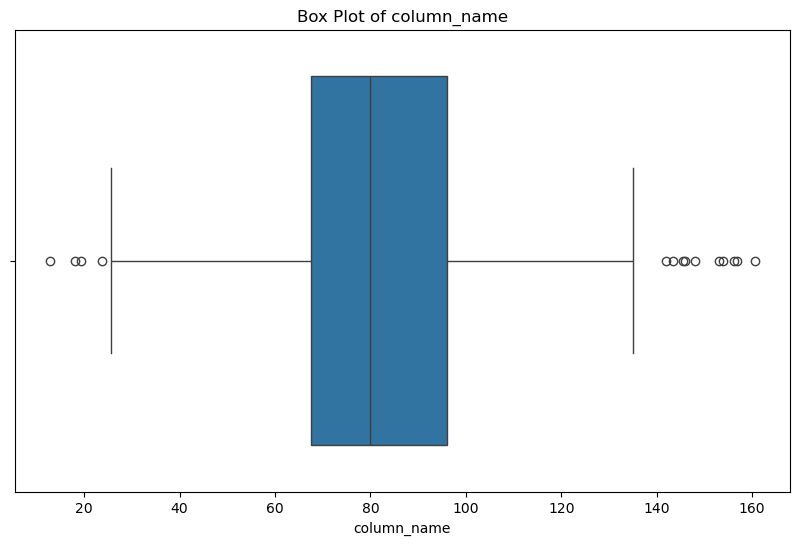

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['hbpermin'])
plt.title('Box Plot of hbpermin')
plt.xlabel('hbpermin')
plt.show()

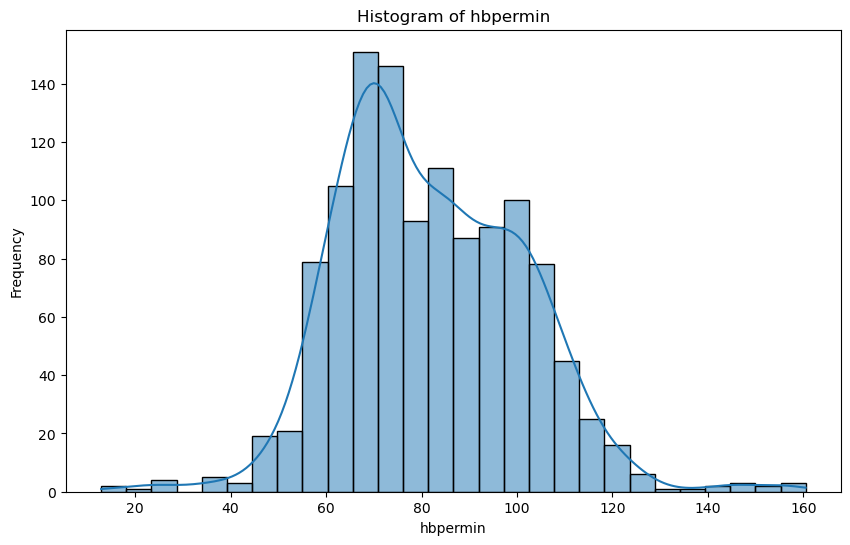

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['hbpermin'], kde=True)
plt.title('Histogram of hbpermin')
plt.xlabel('hbpermin')
plt.ylabel('Frequency')
plt.show()

In [8]:
skewness = df['hbpermin'].skew()
print(f"Skewness: {skewness}")



Skewness: 0.35539973942909786


In [9]:
#handling the skewness of the column
df['hbpermin'], _ = boxcox(df['hbpermin'] + 1)  # Add 1 to avoid negative values

# to check the skewness
skewness_boxcox = df['hbpermin'].skew()
print(f"Skewness after Box-Cox transformation: {skewness_boxcox}")

#handling the outliers and replace them by upper and lower bound
Q1 = df['hbpermin'].quantile(0.25)
Q3 = df['hbpermin'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df['hbpermin'] = df['hbpermin'].clip(lower=lower_bound, upper=upper_bound)

Skewness after Box-Cox transformation: 0.05447775366453183


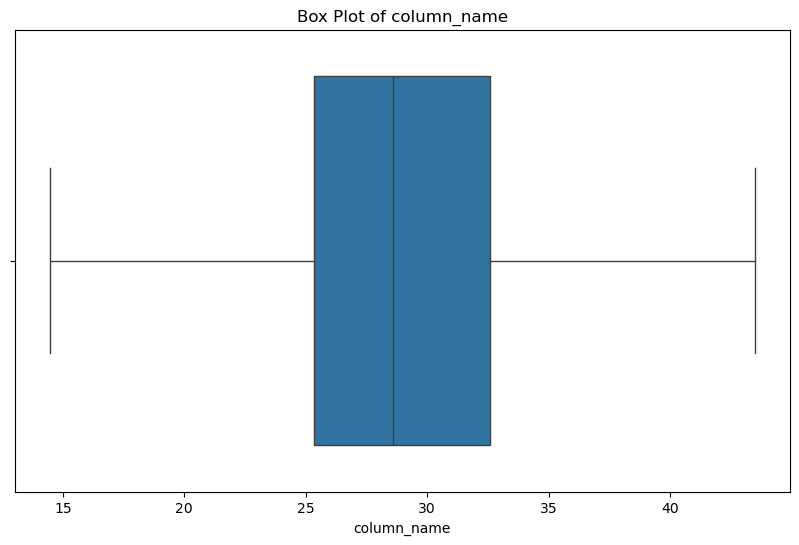

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['hbpermin'])
plt.title('Box Plot of column_name')
plt.xlabel('column_name')
plt.show()

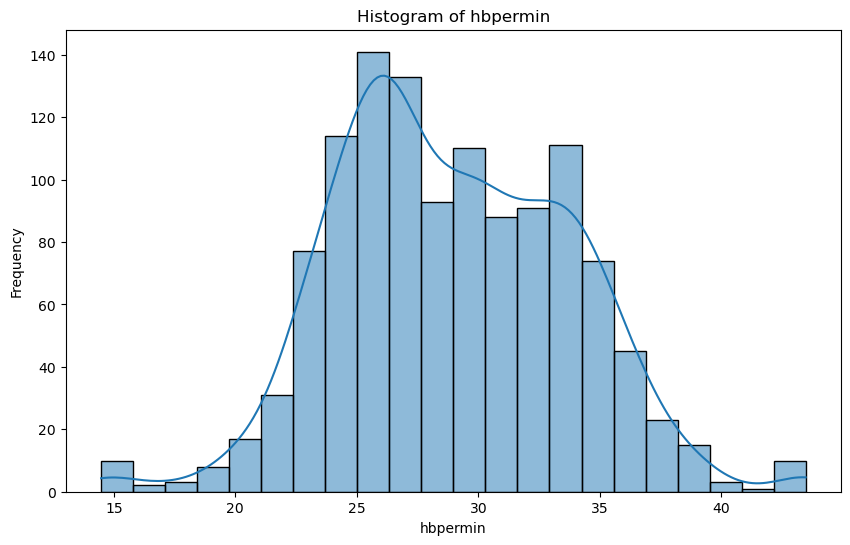

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['hbpermin'], kde=True)
plt.title('Histogram of hbpermin')
plt.xlabel('hbpermin')
plt.ylabel('Frequency')
plt.show()

now the column is clean after the preprocessing no outliers and symmetric 

 Pseg (P Wave Segment)

    Description: The duration of the P wave, which represents atrial depolarization (the electrical activation of the atria).

    Purpose: Abnormal P wave durations can indicate atrial enlargement or conduction issues.



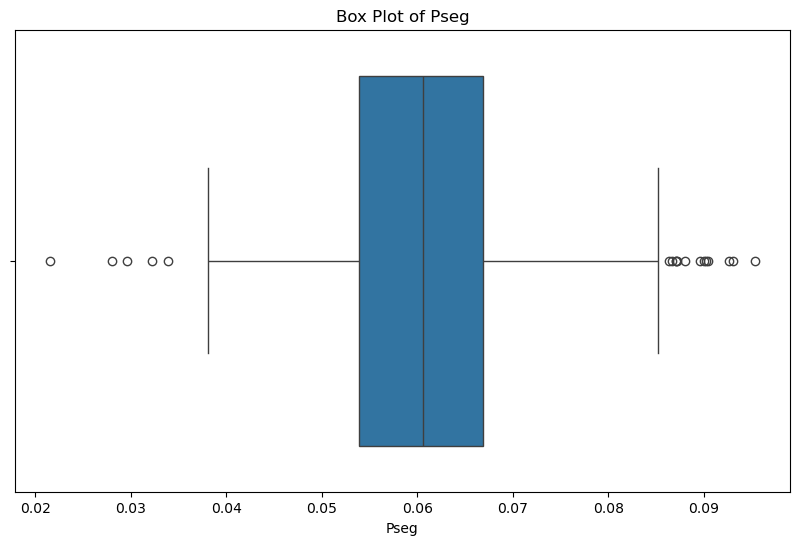

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Pseg'])
plt.title('Box Plot of Pseg')
plt.xlabel('Pseg')
plt.show()

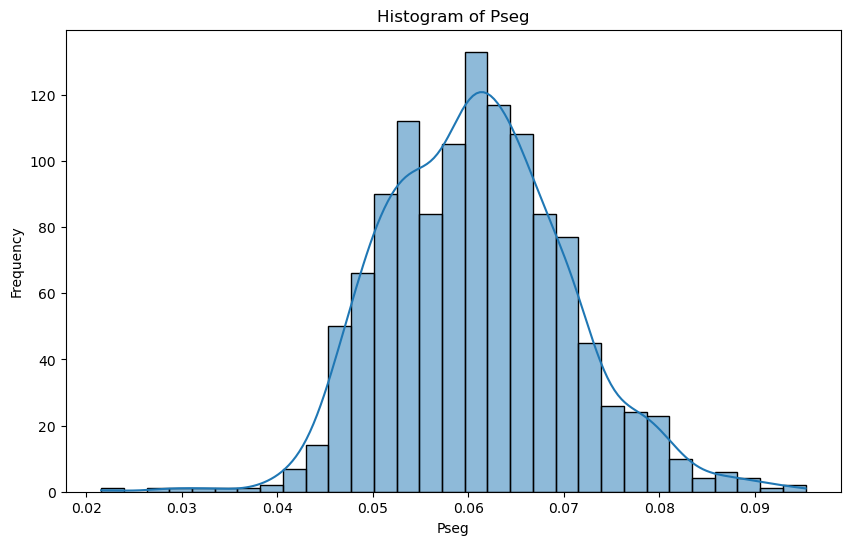

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Pseg'], kde=True)
plt.title('Histogram of Pseg')
plt.xlabel('Pseg')
plt.ylabel('Frequency')
plt.show()

In [38]:
skewness = df['Pseg'].skew()
print(f"Skewness: {skewness}")



Skewness: 0.25986676490615096


In [40]:
++++++++++++++

#handling the outliers and replace them by upper and lower bound
Q1 = df['Pseg'].quantile(0.25)
Q3 = df['Pseg'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df['Pseg'] = df['Pseg'].clip(lower=lower_bound, upper=upper_bound)

Skewness after Box-Cox transformation: -0.010770673021678497


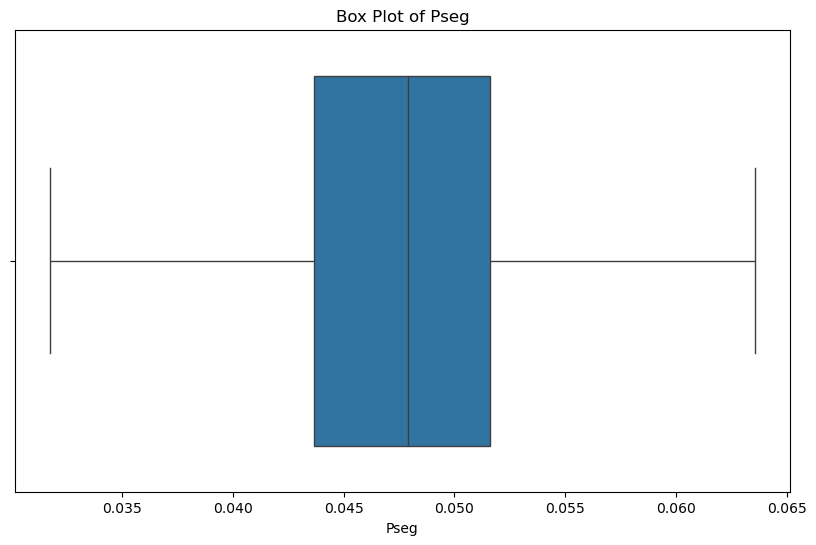

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Pseg'])
plt.title('Box Plot of Pseg')
plt.xlabel('Pseg')
plt.show()

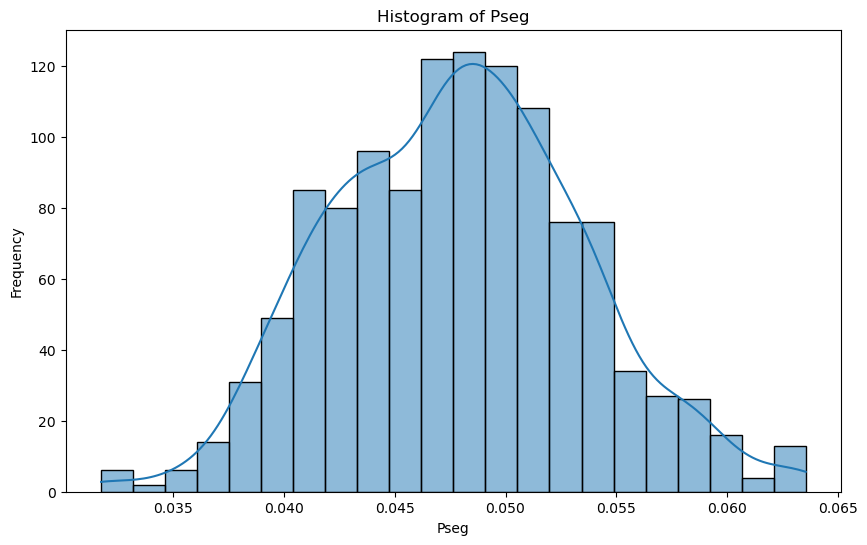

In [44]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Pseg'], kde=True)
plt.title('Histogram of Pseg')
plt.xlabel('Pseg')
plt.ylabel('Frequency')
plt.show()

 PQseg (PQ Segment)

    Description: The time interval from the start of the P wave to the start of the QRS complex.

    Purpose: Reflects the time taken for the electrical signal to travel from the atria to the ventricles via the AV node.

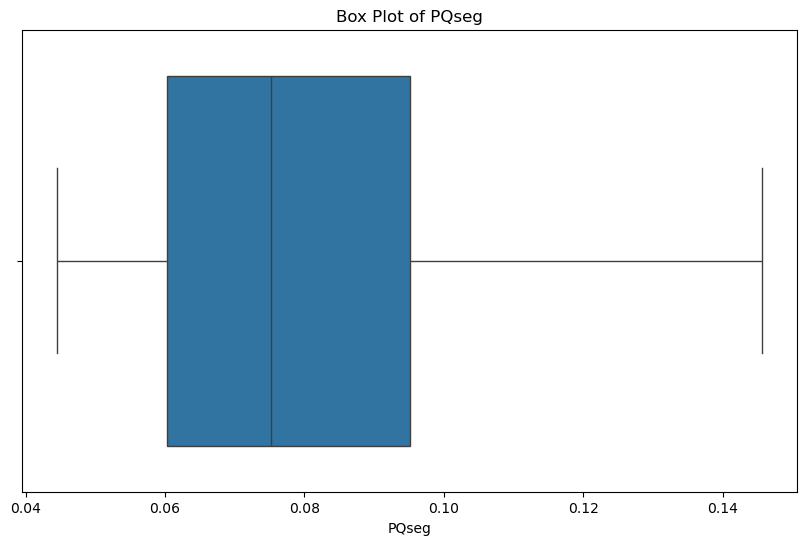

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['PQseg'])
plt.title('Box Plot of PQseg')
plt.xlabel('PQseg')
plt.show()

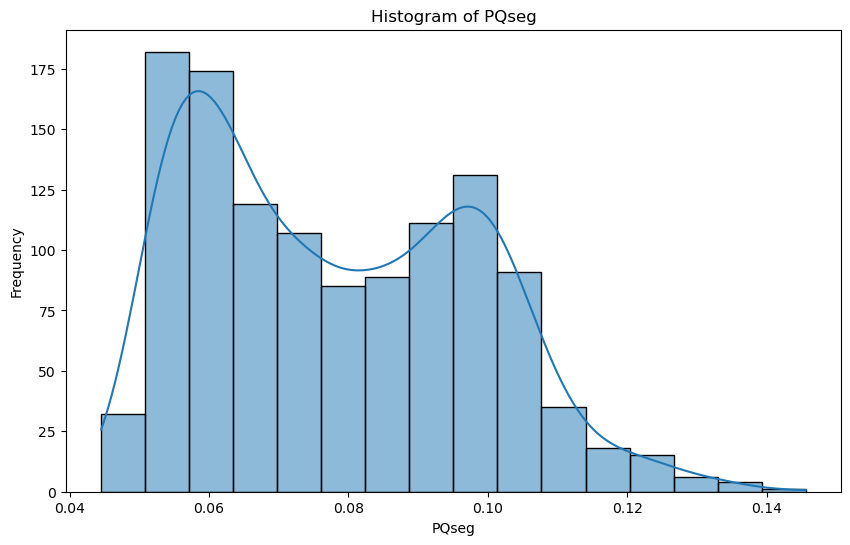

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(df['PQseg'], kde=True)
plt.title('Histogram of PQseg')
plt.xlabel('PQseg')
plt.ylabel('Frequency')
plt.show()

In [57]:
skewness = df['PQseg'].skew()
print(f"Skewness: {skewness}")



Skewness: 0.4076270549567969


In [66]:
#handling the skewness of the column
df['PQseg'], _ = boxcox(df['PQseg'] + 1)  # Add 1 to avoid negative values

# to check the skewness
skewness_boxcox = df['PQseg'].skew()
print(f"Skewness after Box-Cox transformation: {skewness_boxcox}")

Skewness after Box-Cox transformation: 0.08709518958012029


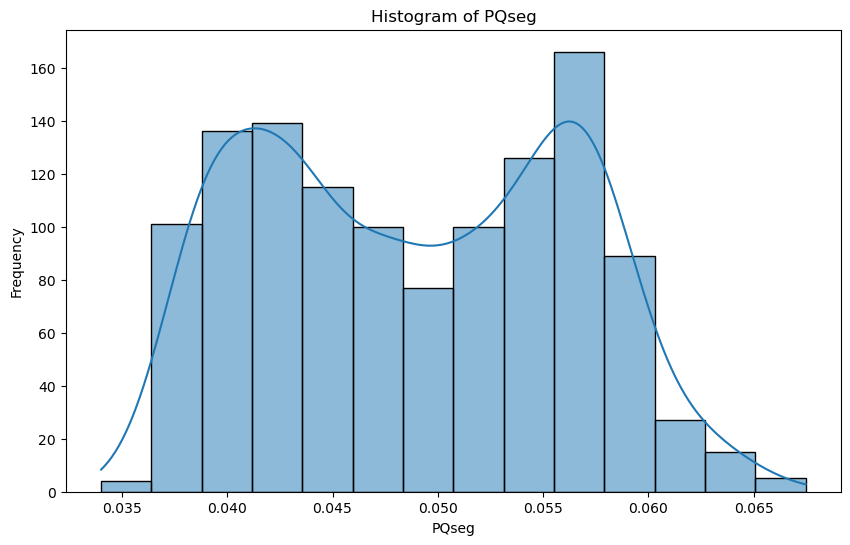

In [68]:
plt.figure(figsize=(10, 6))
sns.histplot(df['PQseg'], kde=True)
plt.title('Histogram of PQseg')
plt.xlabel('PQseg')
plt.ylabel('Frequency')
plt.show()

In [74]:
correlation = df['Pseg'].corr( df['PQseg'])
print(f"Correlation between '{df['Pseg'].name}' and '{ df['PQseg'].name}': {correlation}")

Correlation between 'Pseg' and 'PQseg': 0.39955208504571826


In [76]:
df['PR Interval'] = df['Pseg'] + df['PQseg']

In [78]:
df['PR Interval']

0       0.106162
1       0.101062
2       0.097451
3       0.108152
4       0.102313
          ...   
1195    0.079320
1196    0.081690
1197    0.099219
1198    0.098168
1199    0.100005
Name: PR Interval, Length: 1200, dtype: float64

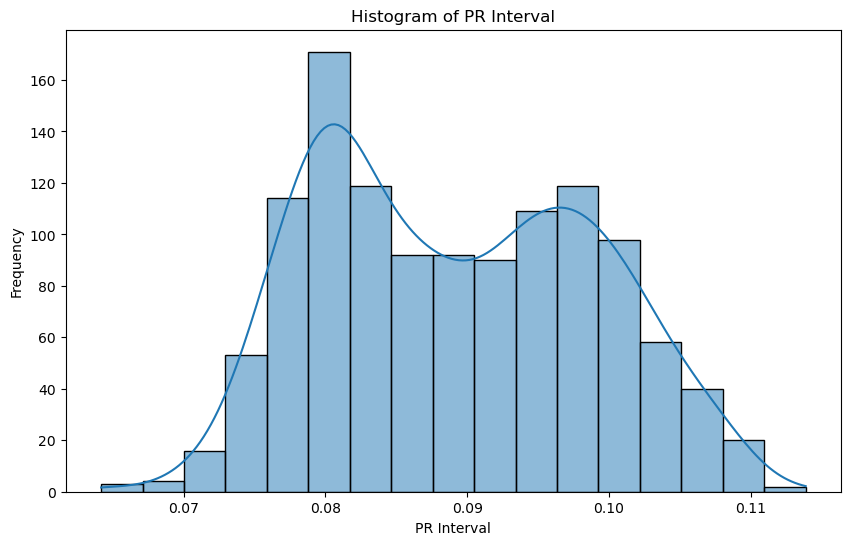

In [82]:
plt.figure(figsize=(10, 6))
sns.histplot(df['PR Interval'], kde=True)
plt.title('Histogram of PR Interval')
plt.xlabel('PR Interval')
plt.ylabel('Frequency')
plt.show()

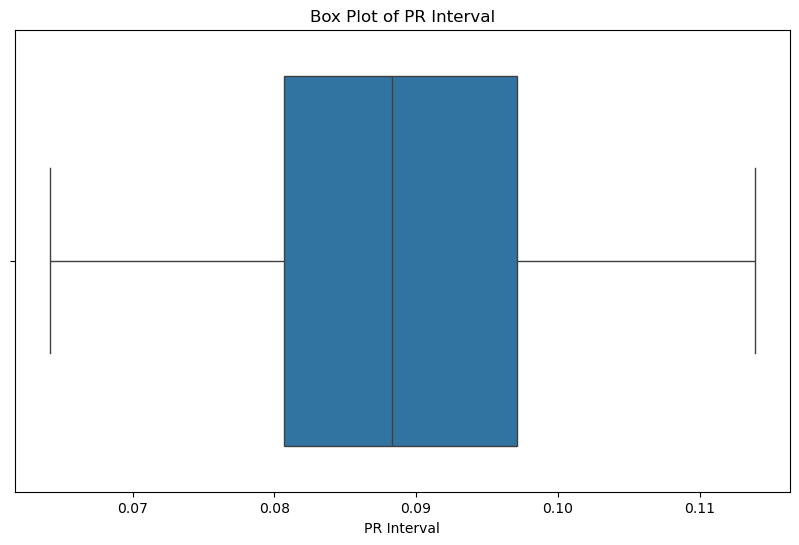

In [86]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['PR Interval'])
plt.title('Box Plot of PR Interval')
plt.xlabel('PR Interval')
plt.show()

In [96]:
numeric_df = df.select_dtypes(include=['number'])

# Step 2: Compute the correlation matrix
correlation_matrix = numeric_df.corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
               RECORD  hbpermin      Pseg     PQseg    QRSseg     QRseg  \
RECORD       1.000000  0.223289 -0.165431 -0.092865 -0.081502 -0.081166   
hbpermin     0.223289  1.000000  0.080371 -0.054863 -0.030494 -0.028172   
Pseg        -0.165431  0.080371  1.000000  0.399552  0.369796  0.368529   
PQseg       -0.092865 -0.054863  0.399552  1.000000  0.863491  0.863901   
QRSseg      -0.081502 -0.030494  0.369796  0.863491  1.000000  0.999237   
QRseg       -0.081166 -0.028172  0.368529  0.863901  0.999237  1.000000   
QTseg       -0.217589 -0.078622  0.324496  0.788802  0.926764  0.923243   
RSseg       -0.081716 -0.032813  0.370507  0.861719  0.999208  0.996892   
STseg       -0.265152 -0.093091 -0.249760 -0.515053 -0.567408 -0.573144   
Tseg        -0.112573 -0.003814 -0.150168 -0.341705 -0.388992 -0.390865   
PTseg       -0.180383 -0.061784  0.377266  0.923713  0.948376  0.946370   
ECGseg      -0.213016 -0.032884  0.448674  0.855661  0.879752  0.877139   
QRtoQ

In [100]:
from the correlaton i notice that there is relations between columns and i get the relations between them and combine them in one column 
- PR Interval=Pseg+PQseg
- QRSseg=QRseg+RSseg
- QTseg=QRSseg+STseg+Tseg
- hbpermin=60/RRmean(so that column is useless)
- Atrial Rate=60/PPmean(so that column is useless)
- 

SyntaxError: invalid syntax (1561104614.py, line 1)

In [104]:
# Drop columns 
columns_to_drop = ['QRSseg', 'STseg','Tseg','QRseg','RSseg','RRmean','PPmean','Pseg','PQseg']
df.drop(columns=columns_to_drop, inplace=True)

KeyError: "['QRSseg', 'STseg', 'Tseg', 'QRseg', 'RSseg', 'RRmean', 'PPmean', 'Pseg', 'PQseg'] not found in axis"

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 48 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   RECORD       1200 non-null   int64  
 1   hbpermin     1200 non-null   float64
 2   QTseg        1200 non-null   float64
 3   PTseg        1200 non-null   float64
 4   ECGseg       1200 non-null   float64
 5   QRtoQSdur    431 non-null    float64
 6   RStoQSdur    431 non-null    float64
 7   PQdis        1200 non-null   float64
 8   PonQdis      1200 non-null   float64
 9   PRdis        1200 non-null   float64
 10  PonRdis      1200 non-null   float64
 11  PSdis        1200 non-null   float64
 12  PonSdis      1200 non-null   float64
 13  PTdis        1200 non-null   float64
 14  PonTdis      1200 non-null   float64
 15  PToffdis     1200 non-null   float64
 16  QRdis        1200 non-null   float64
 17  QSdis        1200 non-null   float64
 18  QTdis        1200 non-null   float64
 19  QToffd

In [112]:
#drop the columns that the most data in it is null andcan't calculate it 
columns_to_drop = ['QRtoQSdur', 'RStoQSdur','PQRang','QRSang','RSTang','QRslope','RSslope']
df.drop(columns=columns_to_drop, inplace=True)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 41 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   RECORD       1200 non-null   int64  
 1   hbpermin     1200 non-null   float64
 2   QTseg        1200 non-null   float64
 3   PTseg        1200 non-null   float64
 4   ECGseg       1200 non-null   float64
 5   PQdis        1200 non-null   float64
 6   PonQdis      1200 non-null   float64
 7   PRdis        1200 non-null   float64
 8   PonRdis      1200 non-null   float64
 9   PSdis        1200 non-null   float64
 10  PonSdis      1200 non-null   float64
 11  PTdis        1200 non-null   float64
 12  PonTdis      1200 non-null   float64
 13  PToffdis     1200 non-null   float64
 14  QRdis        1200 non-null   float64
 15  QSdis        1200 non-null   float64
 16  QTdis        1200 non-null   float64
 17  QToffdis     1200 non-null   float64
 18  RSdis        1200 non-null   float64
 19  RTdis 